In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# raw data

In [2]:
bids = pd.read_csv('data/bids.csv')
trains = pd.read_csv('data/train.csv')
tests = pd.read_csv('data/test.csv')

## info

In [3]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [4]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
bidder_id          4700 non-null object
payment_account    4700 non-null object
address            4700 non-null object
dtypes: object(3)
memory usage: 110.2+ KB


In [5]:
print('Unique trains bidder id: ' + str(trains['bidder_id'].nunique()))
print('Unique trains payment account: ' + str(trains['payment_account'].nunique()))
print('Unique trains address: ' + str(trains['address'].nunique()))
print('Unique tests bidder id: ' + str(tests['bidder_id'].nunique()))
print('Unique tests payment account: ' + str(tests['payment_account'].nunique()))
print('Unique tests address: ' + str(tests['address'].nunique()))

Unique trains bidder id: 2013
Unique trains payment account: 2013
Unique trains address: 2013
Unique tests bidder id: 4700
Unique tests payment account: 4700
Unique tests address: 4700


In [6]:
print('Robot count: ' + str(trains['outcome'][trains['outcome'] == 1].count()))
print('Human count: ' + str(trains['outcome'][trains['outcome'] == 0].count()))

Robot count: 103
Human count: 1910


In [7]:
bids.head(2)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c


In [8]:
bids.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         7656334 non-null int64
bidder_id      7656334 non-null object
auction        7656334 non-null object
merchandise    7656334 non-null object
device         7656334 non-null object
time           7656334 non-null int64
country        7647475 non-null object
ip             7656334 non-null object
url            7656334 non-null object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [9]:
print('Unique bid_id: ' + str(bids['bid_id'].nunique()))
print('Unique bidder_id: ' + str(bids['bidder_id'].nunique()))
print('Unique auction: ' + str(bids['auction'].nunique()))
print('Unique merchandise: ' + str(bids['merchandise'].nunique()))
print('Unique device: ' + str(bids['device'].nunique()))
print('Unique time: ' + str(bids['time'].nunique()))
print('Unique country: ' + str(bids['country'].nunique()))
print('Unique ip: ' + str(bids['ip'].nunique()))
print('Unique url: ' + str(bids['url'].nunique()))

Unique bid_id: 7656334
Unique bidder_id: 6614
Unique auction: 15051
Unique merchandise: 10
Unique device: 7351
Unique time: 776529
Unique country: 199
Unique ip: 2303991
Unique url: 1786351


In [4]:
bids_sheet = pd.merge(bids, trains[['bidder_id', 'outcome']], how='left', on='bidder_id')
test_sheet = bids_sheet[bids_sheet['outcome'].isnull()]
bot_sheet = bids_sheet[bids_sheet['outcome'] == 1]
human_sheet = bids_sheet[bids_sheet['outcome'] == 0]

In [12]:
print('Train id count: ' + str(bot_sheet['bidder_id'].nunique() + human_sheet['bidder_id'].nunique()))
print('Test id count: ' + str(test_sheet['bidder_id'].nunique()))

Train id count: 1984
Test id count: 4630


In [26]:
test_id = test_sheet['bidder_id'][test_sheet['country'].isnull()].unique()
bot_id = bot_sheet['bidder_id'][bot_sheet['country'].isnull()].unique()
human_id = human_sheet['bidder_id'][human_sheet['country'].isnull()].unique()

## NA country stat

In [51]:
na_bot_sheet = bot_sheet[bot_sheet['bidder_id'].isin(bot_id)].fillna('unknown')
na_human_sheet = human_sheet[human_sheet['bidder_id'].isin(human_id)].fillna('unknown')
na_test_sheet = test_sheet[test_sheet['bidder_id'].isin(test_id)].fillna('unknown')

In [52]:
def country_p(series):
    na_country = series[series == 'unknown'].count()
    total = series.count()
    return na_country / total

In [54]:
na_bot_sheet.groupby('bidder_id')['country'].apply(country_p)

bidder_id
334714f005e994d46cf4d18093dd4d05fyxc8    0.002646
3714da7069a5205137cacf89ab3a136ffx2u2    0.000534
458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3    0.000858
52d8066e28f168e5bee769559ead307e1go7e    0.000385
5f529b5ee68b60482c5d0c56ee91f3c2cjrmx    0.007511
6362c8d61774cfcb6ada7cea1be63678hxkfz    0.001267
7b31d9d8b5e749cdd2c300cbcbb5f875kjlsz    0.037477
8bf07d8631a2808f2c869e27afad2d41swgkd    0.005140
8f086b809805064f3c4a5dd48327c0f51yplz    0.006079
9434778d2268f1fa2a8ede48c0cd05c097zey    0.004128
9655ccc7c0c193f1549475f02c54dce45kjw7    0.000531
9be39ea5a0612fae7bc43a25a6d10856l3qaj    0.004983
a0660fe8a46b9cb6b02e7b0c50eef6a905vt6    0.001563
aaa686462ebb950550fc1c6136ffb273vkrc5    0.007092
ae6758a627a111f6d6b530b0154c429566o4k    0.022082
c277151116ce38d8245f9f2308807af8t4nnj    0.006931
Name: country, dtype: float64

In [74]:
na_human_cty_p = na_human_sheet.groupby('bidder_id')['country'].apply(country_p)
print(len(na_human_cty_p))
na_human_cty_p[na_human_cty_p >= 0.5]

168


bidder_id
29b8af2fea3881ef61911612372dac41vczqv    1.00
d8a10762de6d62c087a0a8f0e61cf78bbgke6    0.75
Name: country, dtype: float64

In [75]:
na_test_cty_p = na_test_sheet.groupby('bidder_id')['country'].apply(country_p)
print(len(na_test_cty_p))
na_test_cty_p[na_test_cty_p >= 0.5]

398


bidder_id
17bda4ecaa93e80a2dc4a0d4ac351dd8kjodg    0.5
5e05ec450e2dd64d7996a08bbbca4f126nzzk    1.0
88ef9cfdbec4c9e33f6c2e0b512e7a01dp2p2    1.0
96bd76b36803ecb04e24f5f3fbc4759934qvv    0.5
bfcc04fba5e5af63898d4eeaec0852a5t0kcz    0.5
df20f216cbb0b0df5a7b2e94b16a7853iyw9g    1.0
f3ab8c9ecc0d021ebc81e89f20c8267bn812w    1.0
Name: country, dtype: float64

## naive stat

In [6]:
bot_sheet = bot_sheet.fillna('unknown')
human_sheet = human_sheet.fillna('unknown')
test_sheet = test_sheet.fillna('unknown')

In [14]:
naive_stat = pd.DataFrame(index=bids.columns.drop('bidder_id'), 
                          columns=['h_mean', 'h_std', 'h_max', 'h_min', 'b_mean', 'b_std', 'b_max', 'b_min', 't_mean', 't_std', 't_max', 't_min'], 
                          data=np.nan)

In [17]:
for i in bids.columns.drop('bidder_id'):
    if i == 'bid_id':
        human_g = human_sheet.groupby('bidder_id')[i].count()
        bot_g = bot_sheet.groupby('bidder_id')[i].count()
        test_g = test_sheet.groupby('bidder_id')[i].count()
    else:
        human_g = human_sheet.groupby('bidder_id')[i].nunique()
        bot_g = bot_sheet.groupby('bidder_id')[i].nunique()
        test_g = test_sheet.groupby('bidder_id')[i].nunique()
    naive_stat.loc[i, 'h_mean'] = human_g.mean()
    naive_stat.loc[i, 'h_std'] = human_g.std()
    naive_stat.loc[i, 'h_max'] = human_g.max()
    naive_stat.loc[i, 'h_min'] = human_g.min()
    naive_stat.loc[i, 'b_mean'] = bot_g.mean()
    naive_stat.loc[i, 'b_std'] = bot_g.std()
    naive_stat.loc[i, 'b_max'] = bot_g.max()
    naive_stat.loc[i, 'b_min'] = bot_g.min()
    naive_stat.loc[i, 't_mean'] = test_g.mean()
    naive_stat.loc[i, 't_std'] = test_g.std()
    naive_stat.loc[i, 't_max'] = test_g.max()
    naive_stat.loc[i, 't_min'] = test_g.min()

In [18]:
naive_stat

,h_mean,h_std,h_max,h_min,b_mean,b_std,b_max,b_min,t_mean,t_std,t_max,t_min
bid_id,1413.507709,14597.535155,515033.0,1.0,4004.038835,16370.097403,161935.0,1.0,990.304536,6227.856448,168995.0,1.0
auction,58.070707,142.933476,1623.0,1.0,145.038835,195.103186,1018.0,1.0,55.760475,124.486828,1726.0,1.0
merchandise,1.000532,0.023057,2.0,1.0,1.000000,0.000000,1.0,1.0,1.000000,0.000000,1.0,1.0
device,73.947368,184.560908,2618.0,1.0,163.611650,222.811854,1144.0,1.0,71.224406,164.947305,2069.0,1.0
time,1175.801170,9312.844552,283463.0,1.0,3670.582524,13971.629025,136980.0,1.0,918.739957,5334.479886,135480.0,1.0
country,12.676768,22.870373,164.0,1.0,26.475728,31.158622,179.0,1.0,12.477322,22.157906,171.0,0.0
ip,581.256247,4140.678180,109159.0,1.0,2387.796117,11269.674137,111918.0,1.0,487.984233,2525.546673,58150.0,1.0
url,335.187135,2735.527301,81376.0,1.0,544.582524,1163.909786,8551.0,1.0,267.042765,2000.302904,73417.0,1.0


# charts

### single element

In [16]:
def do_box(human, bot, outlier=True):
    name = human.name
    h_frame = pd.DataFrame(columns=['numbers'], data=human.values)
    h_frame[name] = 'human'
    b_frame = pd.DataFrame(columns=['numbers'], data=bot.values)
    b_frame[name] = 'robot'
    frame = h_frame.append(b_frame, ignore_index=True)
    return sns.boxplot(x=human.name, y='numbers', data=frame, showfliers=outlier)

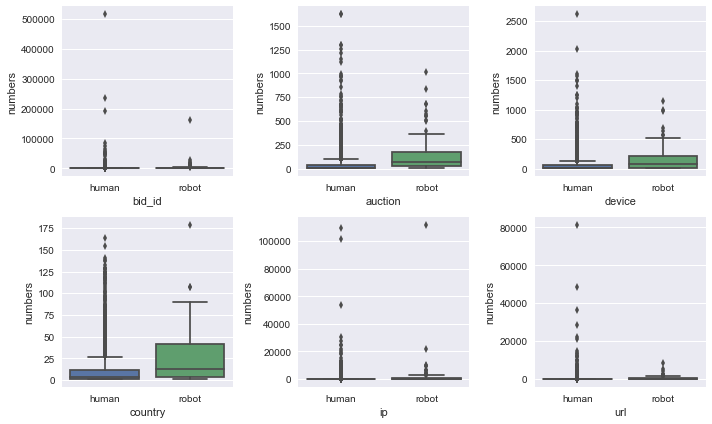

In [25]:
## with outliers
human_g = human_sheet.groupby('bidder_id')
bot_g = bot_sheet.groupby('bidder_id')

plt.figure(figsize=(10, 6), facecolor='w')
plt.subplot(231)
do_box(human_g['bid_id'].count(), bot_g['bid_id'].count())
plt.subplot(232)
do_box(human_g['auction'].nunique(), bot_g['auction'].nunique())
plt.subplot(233)
do_box(human_g['device'].nunique(), bot_g['device'].nunique())
plt.subplot(234)
do_box(human_g['country'].nunique(), bot_g['country'].nunique())
plt.subplot(235)
do_box(human_g['ip'].nunique(), bot_g['ip'].nunique())
plt.subplot(236)
do_box(human_g['url'].nunique(), bot_g['url'].nunique())

plt.tight_layout()
plt.show()

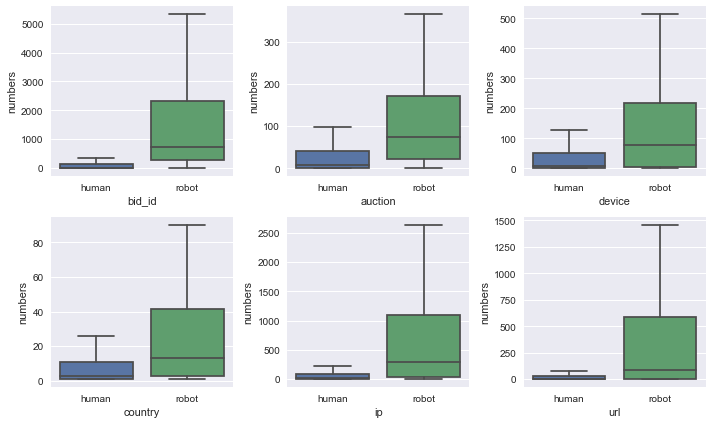

In [26]:
## without outliers
human_g = human_sheet.groupby('bidder_id')
bot_g = bot_sheet.groupby('bidder_id')

plt.figure(figsize=(10, 6), facecolor='w')
plt.subplot(231)
do_box(human_g['bid_id'].count(), bot_g['bid_id'].count(), outlier=False)
plt.subplot(232)
do_box(human_g['auction'].nunique(), bot_g['auction'].nunique(), outlier=False)
plt.subplot(233)
do_box(human_g['device'].nunique(), bot_g['device'].nunique(), outlier=False)
plt.subplot(234)
do_box(human_g['country'].nunique(), bot_g['country'].nunique(), outlier=False)
plt.subplot(235)
do_box(human_g['ip'].nunique(), bot_g['ip'].nunique(), outlier=False)
plt.subplot(236)
do_box(human_g['url'].nunique(), bot_g['url'].nunique(), outlier=False)

plt.tight_layout()
plt.show()

### time line

In [39]:
t_sheet = bids['time'].value_counts()

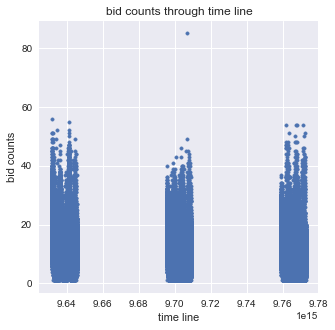

In [44]:
plt.figure(figsize=(5, 5), facecolor='w')
plt.scatter(t_sheet.index, t_sheet.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('bid counts through time line')
plt.show()

In [49]:
time_line = np.sort(bids['time'].unique())
t_dif = np.unique(np.diff(time_line))
print(t_dif)

[      52631578       52631579      105263157      105263158      157894736
      157894737      210526315      210526316      315789474      421052632
      526315789      526315790 50021105263158]


In [56]:
t_start = []
t_end = []
t_start.append(time_line[0])
for i in range(len(time_line)-1):
    if time_line[i+1] - time_line[i] == 50021105263158:
        t_start.append(time_line[i+1])
        t_end.append(time_line[i])
t_end.append(time_line[-1])
print(t_start)
print(t_end)

[9631916842105263, 9695580000000000, 9759243157894736]
[9645558894736842, 9709222052631578, 9772885210526315]


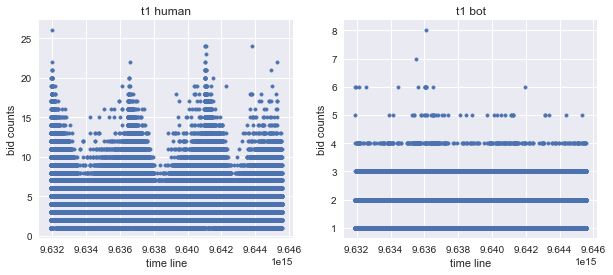

In [59]:
## t cluster 1
t_human = human_sheet['time'][human_sheet['time'].between(9631916842105263, 9645558894736842)].value_counts()
t_bot = bot_sheet['time'][bot_sheet['time'].between(9631916842105263, 9645558894736842)].value_counts()

plt.figure(figsize=(10, 4), facecolor='w')
plt.subplot(121)
plt.scatter(t_human.index, t_human.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('t1 human')
plt.subplot(122)
plt.scatter(t_bot.index, t_bot.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('t1 bot')
plt.show()

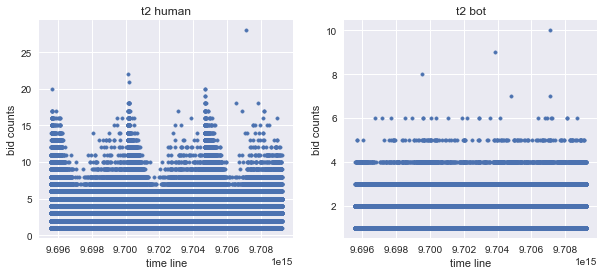

In [60]:
## t cluster 2
t_human = human_sheet['time'][human_sheet['time'].between(9695580000000000, 9709222052631578)].value_counts()
t_bot = bot_sheet['time'][bot_sheet['time'].between(9695580000000000, 9709222052631578)].value_counts()

plt.figure(figsize=(10, 4), facecolor='w')
plt.subplot(121)
plt.scatter(t_human.index, t_human.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('t2 human')
plt.subplot(122)
plt.scatter(t_bot.index, t_bot.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('t2 bot')
plt.show()

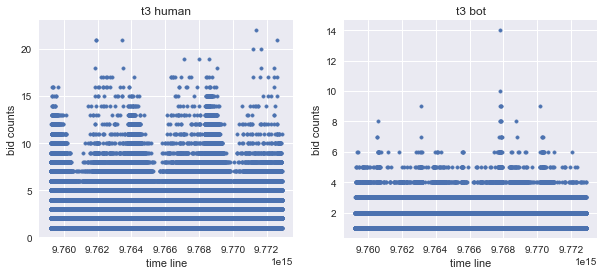

In [61]:
## t cluster 3
t_human = human_sheet['time'][human_sheet['time'].between(9759243157894736, 9772885210526315)].value_counts()
t_bot = bot_sheet['time'][bot_sheet['time'].between(9759243157894736, 9772885210526315)].value_counts()

plt.figure(figsize=(10, 4), facecolor='w')
plt.subplot(121)
plt.scatter(t_human.index, t_human.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('t3 human')
plt.subplot(122)
plt.scatter(t_bot.index, t_bot.values, marker='.')
plt.xlabel('time line')
plt.ylabel('bid counts')
plt.title('t3 bot')
plt.show()

# result

In [6]:
knn = pd.read_csv('result/output_0603_knn.csv', ).rename(columns={'prediction': 'knn'})
rf = pd.read_csv('result/output_0603_rf.csv', ).rename(columns={'prediction': 'rf'})
lgb = pd.read_csv('result/output_0603_lgb.csv', ).rename(columns={'prediction': 'lgb'})
result = knn.merge(rf, on='bidder_id').merge(lgb, on='bidder_id')
del knn, rf, lgb

In [7]:
result.describe()

,knn,rf,lgb
count,4700.000000,4700.000000,4700.000000
mean,0.027699,0.048776,0.051190
std,0.054629,0.091196,0.111787
min,0.000000,0.000000,0.000000
25%,0.000000,0.001804,0.005526
50%,0.000000,0.008324,0.009142
75%,0.027817,0.042140,0.019987
max,0.631316,0.643884,0.891113


In [15]:
q_sheet = pd.DataFrame(index=['q95', 'q99'], columns=['knn', 'rf', 'lgb'])
q95 = result.quantile(q=0.95)
q99 = result.quantile(q=0.99)
q_sheet.loc['q95', q95.index] = q95.values
q_sheet.loc['q99', q99.index] = q99.values
q_sheet

,knn,rf,lgb
q95,0.132831,0.238262,0.267393
q99,0.258214,0.439829,0.603878
